In [28]:
import pandas as pd


# In[83]:
df = pd.read_csv('Data_Train.csv')
df.head(10)
print(df.shape)


(78458, 11)


In [29]:

#Replace K, M, B
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    if ',' in x:
        return float(x.replace(',', '')) 
    return float(x)

df.Likes = df.Likes.apply(value_to_float)
df.Popularity = df.Popularity.apply(value_to_float)
df.to_csv('Data_Train_Transformed_1.csv')
df = df[df['Views'] > df["Likes"]]
# print(df.shape)
# print(df.head())

In [30]:
df.isnull().sum()

Unique_ID     0
Name          0
Genre         0
Country       0
Song_Name     1
Timestamp     0
Views         0
Comments      0
Likes         0
Popularity    0
Followers     0
dtype: int64

In [31]:
# Distribution of features by Genre
df_mean = df.groupby('Genre').mean()
#df_mean

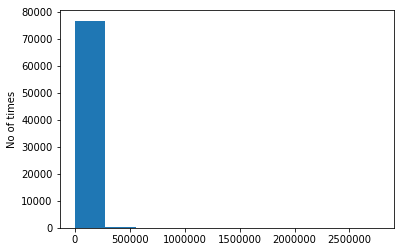

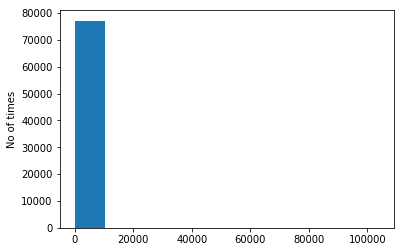

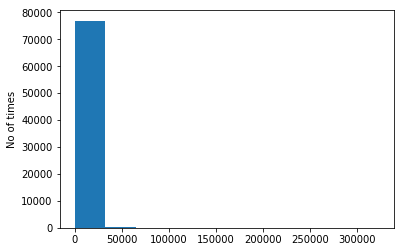

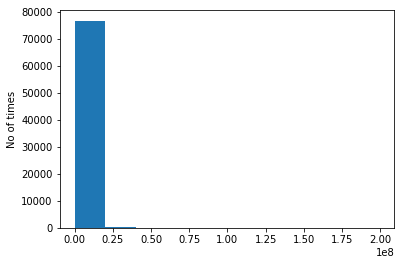

In [32]:
#Histogram Plotting each variable
#Plotting Likes or comments or popularity
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df['Likes'])
plt.ylabel('No of times')
plt.show()

#Plotting Comments
plt.hist(df['Comments'])
plt.ylabel('No of times')
plt.show()

#Plotting Popularity
plt.hist(df['Popularity'])
plt.ylabel('No of times')
plt.show()

#Plotting Views
plt.hist(df['Views'])
plt.ylabel('No of times')
plt.show()

Text(0,0.5,'Likes')

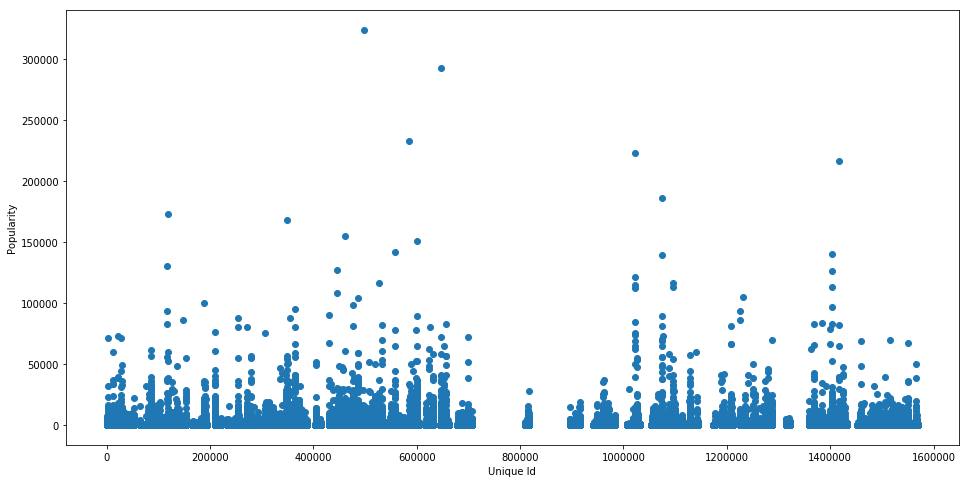

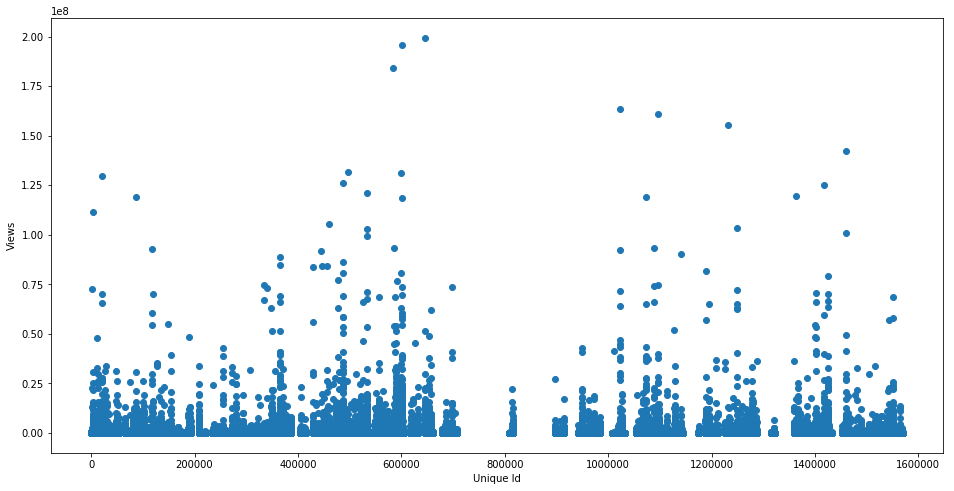

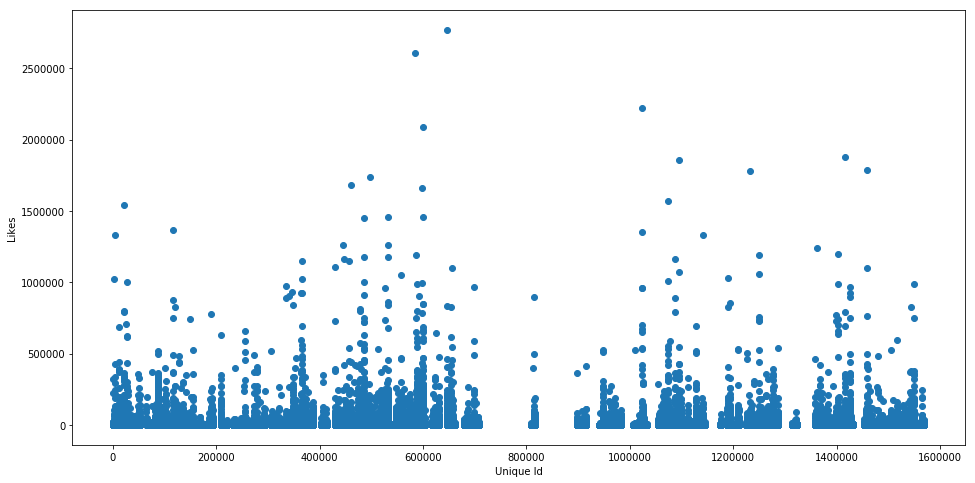

In [33]:
# Scatter Plot
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Unique_ID'], df['Popularity'])
ax.set_xlabel('Unique Id')
ax.set_ylabel('Popularity')

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Unique_ID'], df['Views'])
ax.set_xlabel('Unique Id')
ax.set_ylabel('Views')

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Unique_ID'], df['Likes'])
ax.set_xlabel('Unique Id')
ax.set_ylabel('Likes')

In [34]:
#Correlation matrix
print(df.head())
df.drop(['Unique_ID','Country','Timestamp','Song_Name','Comments','Followers'],inplace = True, axis = 1)
df.head()


   Unique_ID              Name     Genre Country  \
0     413890         Hardstyle  danceedm      AU   
1     249453        Dj Aladdin  danceedm      AU   
2     681116  Maxximize On Air  danceedm      AU   
3     387253       GR6 EXPLODE    rbsoul      AU   
4    1428029          Tritonal  danceedm      AU   

                                           Song_Name  \
0  N-Vitral presents BOMBSQUAD - Poison Spitter (...   
1          Dj Aladdin - Old School Hip Hop Quick Mix   
2  Maxximize On Air - Mixed by Blasterjaxx - Epis...   
3                MC Yago - Tenho Compromisso (DJ R7)   
4                         Escape (feat. Steph Jones)   

                    Timestamp   Views  Comments   Likes  Popularity  Followers  
0  2018-03-30 15:24:45.000000   14017         4   499.0        97.0     119563  
1  2016-06-20 05:58:52.000000    1918        17    49.0        17.0       2141  
2  2015-05-08 17:45:59.000000    9668        11   312.0        91.0      22248  
3  2017-06-08 23:50:03.000

,Name,Genre,Views,Likes,Popularity
0,Hardstyle,danceedm,14017,499.0,97.0
1,Dj Aladdin,danceedm,1918,49.0,17.0
2,Maxximize On Air,danceedm,9668,312.0,91.0
3,GR6 EXPLODE,rbsoul,113036,2400.0,76.0
4,Tritonal,danceedm,110024,3031.0,699.0


In [35]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Converting Genre and Name to labelencoding
labelencoder = LabelEncoder()
df['Genre'] = labelencoder.fit_transform(df['Genre'])
df['Name'] = labelencoder.fit_transform(df['Name'])
df.head()


,Name,Genre,Views,Likes,Popularity
0,398,5,14017,499.0,97.0
1,264,5,1918,49.0,17.0
2,629,5,9668,312.0,91.0
3,361,17,113036,2400.0,76.0
4,970,5,110024,3031.0,699.0


In [36]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
sc_x = StandardScaler()
ct = ColumnTransformer([
         ('somename', StandardScaler(), ['Name','Genre','Likes', 'Popularity'])
       ], remainder='passthrough')
df = ct.fit_transform(df)
df = pd.DataFrame(df,columns=['Name','Genre','Likes','Popularity','Views'])
print(df.head())

       Name     Genre     Likes  Popularity     Views
0 -0.628392 -0.623009 -0.159204   -0.173071   14017.0
1 -1.031288 -0.623009 -0.167662   -0.189570    1918.0
2  0.066151 -0.623009 -0.162719   -0.174308    9668.0
3 -0.739640  1.384875 -0.123471   -0.177402  113036.0
4  1.091430 -0.623009 -0.111610   -0.048918  110024.0


D:\Applns\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Applns\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [37]:
#Removing outliers using IQR
Q1 = df.quantile(0.25,numeric_only=True)
Q3 = df.quantile(0.75,numeric_only=True)
IQR = Q3 - Q1
#df = df[~((df["Likes"] < (Q1 - 1.5 * IQR)) |(df["Likes"] > (Q3 + 1.5 * IQR)))]
df= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)
df.head()

(62714, 5)


,Name,Genre,Likes,Popularity,Views
0,-0.628392,-0.623009,-0.159204,-0.173071,14017.0
1,-1.031288,-0.623009,-0.167662,-0.189570,1918.0
2,0.066151,-0.623009,-0.162719,-0.174308,9668.0
3,-0.739640,1.384875,-0.123471,-0.177402,113036.0
4,1.091430,-0.623009,-0.111610,-0.048918,110024.0


In [38]:
df.isnull().sum()


Name          0
Genre         0
Likes         0
Popularity    0
Views         0
dtype: int64

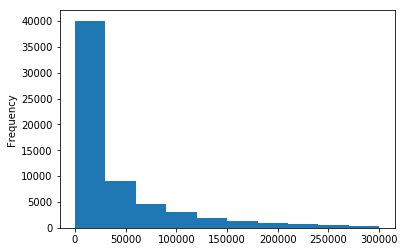

In [39]:
y = df['Views']
df.drop('Views', inplace=True,axis=1)
y.plot.hist()

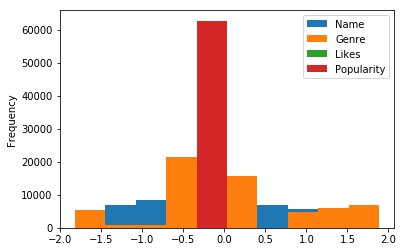

In [40]:
df.describe()
df.plot.hist()

In [43]:
from sklearn.model_selection import train_test_split
#print(df_scaled)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2, random_state=205)

In [44]:
#XGB Boost regression
import xgboost as xgb
from sklearn import metrics
xlf = xgb.XGBRegressor()
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)])
# calculate the auc score
y_pred = xlf.predict(X_test)
#RMSE - Test
print("XGBoost - Linear regression: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


[08:36:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:63639.6
[1]	validation_0-rmse:58673.1
[2]	validation_0-rmse:54289
[3]	validation_0-rmse:50413.4


D:\Applns\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[4]	validation_0-rmse:47025.8
[5]	validation_0-rmse:44032.5
[6]	validation_0-rmse:41441.5
[7]	validation_0-rmse:39198.8
[8]	validation_0-rmse:37233.3
[9]	validation_0-rmse:35531.4
[10]	validation_0-rmse:34065.8
[11]	validation_0-rmse:32799.4
[12]	validation_0-rmse:31731.8
[13]	validation_0-rmse:30827.8
[14]	validation_0-rmse:30012.3
[15]	validation_0-rmse:29351.3
[16]	validation_0-rmse:28752.7
[17]	validation_0-rmse:28283.7
[18]	validation_0-rmse:27839
[19]	validation_0-rmse:27472.8
[20]	validation_0-rmse:27178.1
[21]	validation_0-rmse:26906.7
[22]	validation_0-rmse:26692.6
[23]	validation_0-rmse:26466.1
[24]	validation_0-rmse:26295.1
[25]	validation_0-rmse:26146.5
[26]	validation_0-rmse:26031.2
[27]	validation_0-rmse:25908.4
[28]	validation_0-rmse:25800.6
[29]	validation_0-rmse:25709.6
[30]	validation_0-rmse:25628.9
[31]	validation_0-rmse:25564.9
[32]	validation_0-rmse:25485.2
[33]	validation_0-rmse:25369.1
[34]	validation_0-rmse:25331.4
[35]	validation_0-rmse:25285.7
[36]	validation_

In [46]:
#Implementing Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
print("RMSE - Linear regression: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


RMSE - Linear regression:  26964.94857717814
